In [13]:
import pandas as pd
pd.options.mode.copy_on_write = True
pd.options.display.float_format = '{:.0f}'.format

data_b = pd.read_csv('./b.csv')
data_b = data_b.rename(columns={'Contact ID (anonymised donor)': 'Donor ID', 'Categories the donor contributed to': 'Categories', 
                                'Total donation amount': 'Total Donation Amount', 'No. of donations made': 'Num Of Donations'})
data_b['Categories'] = data_b['Categories'].str.replace('Foreign Domestic Workers', 'Migrant Workers')

In [14]:
print(data_b.head())

   Donor ID                                         Categories  \
0        16  Children,Family,Fundraising,Medical,Migrant Wo...   
1        18                      Children,Elderly,Food,Medical   
2        19                      Children,Elderly,Food,Medical   
3        21                      Children,Elderly,Food,Medical   
4        24                      Children,Elderly,Food,Medical   

   Total Donation Amount  Num Of Donations  
0                    300                10  
1                    120                 4  
2                    132                 4  
3                   1064                 8  
4                    120                 4  


In [15]:
total_donation_amount = data_b['Total Donation Amount']

In [16]:
print(total_donation_amount.describe())

count       67776
mean         3085
std        593849
min             0
25%            55
50%           110
75%           220
max     153785457
Name: Total Donation Amount, dtype: float64


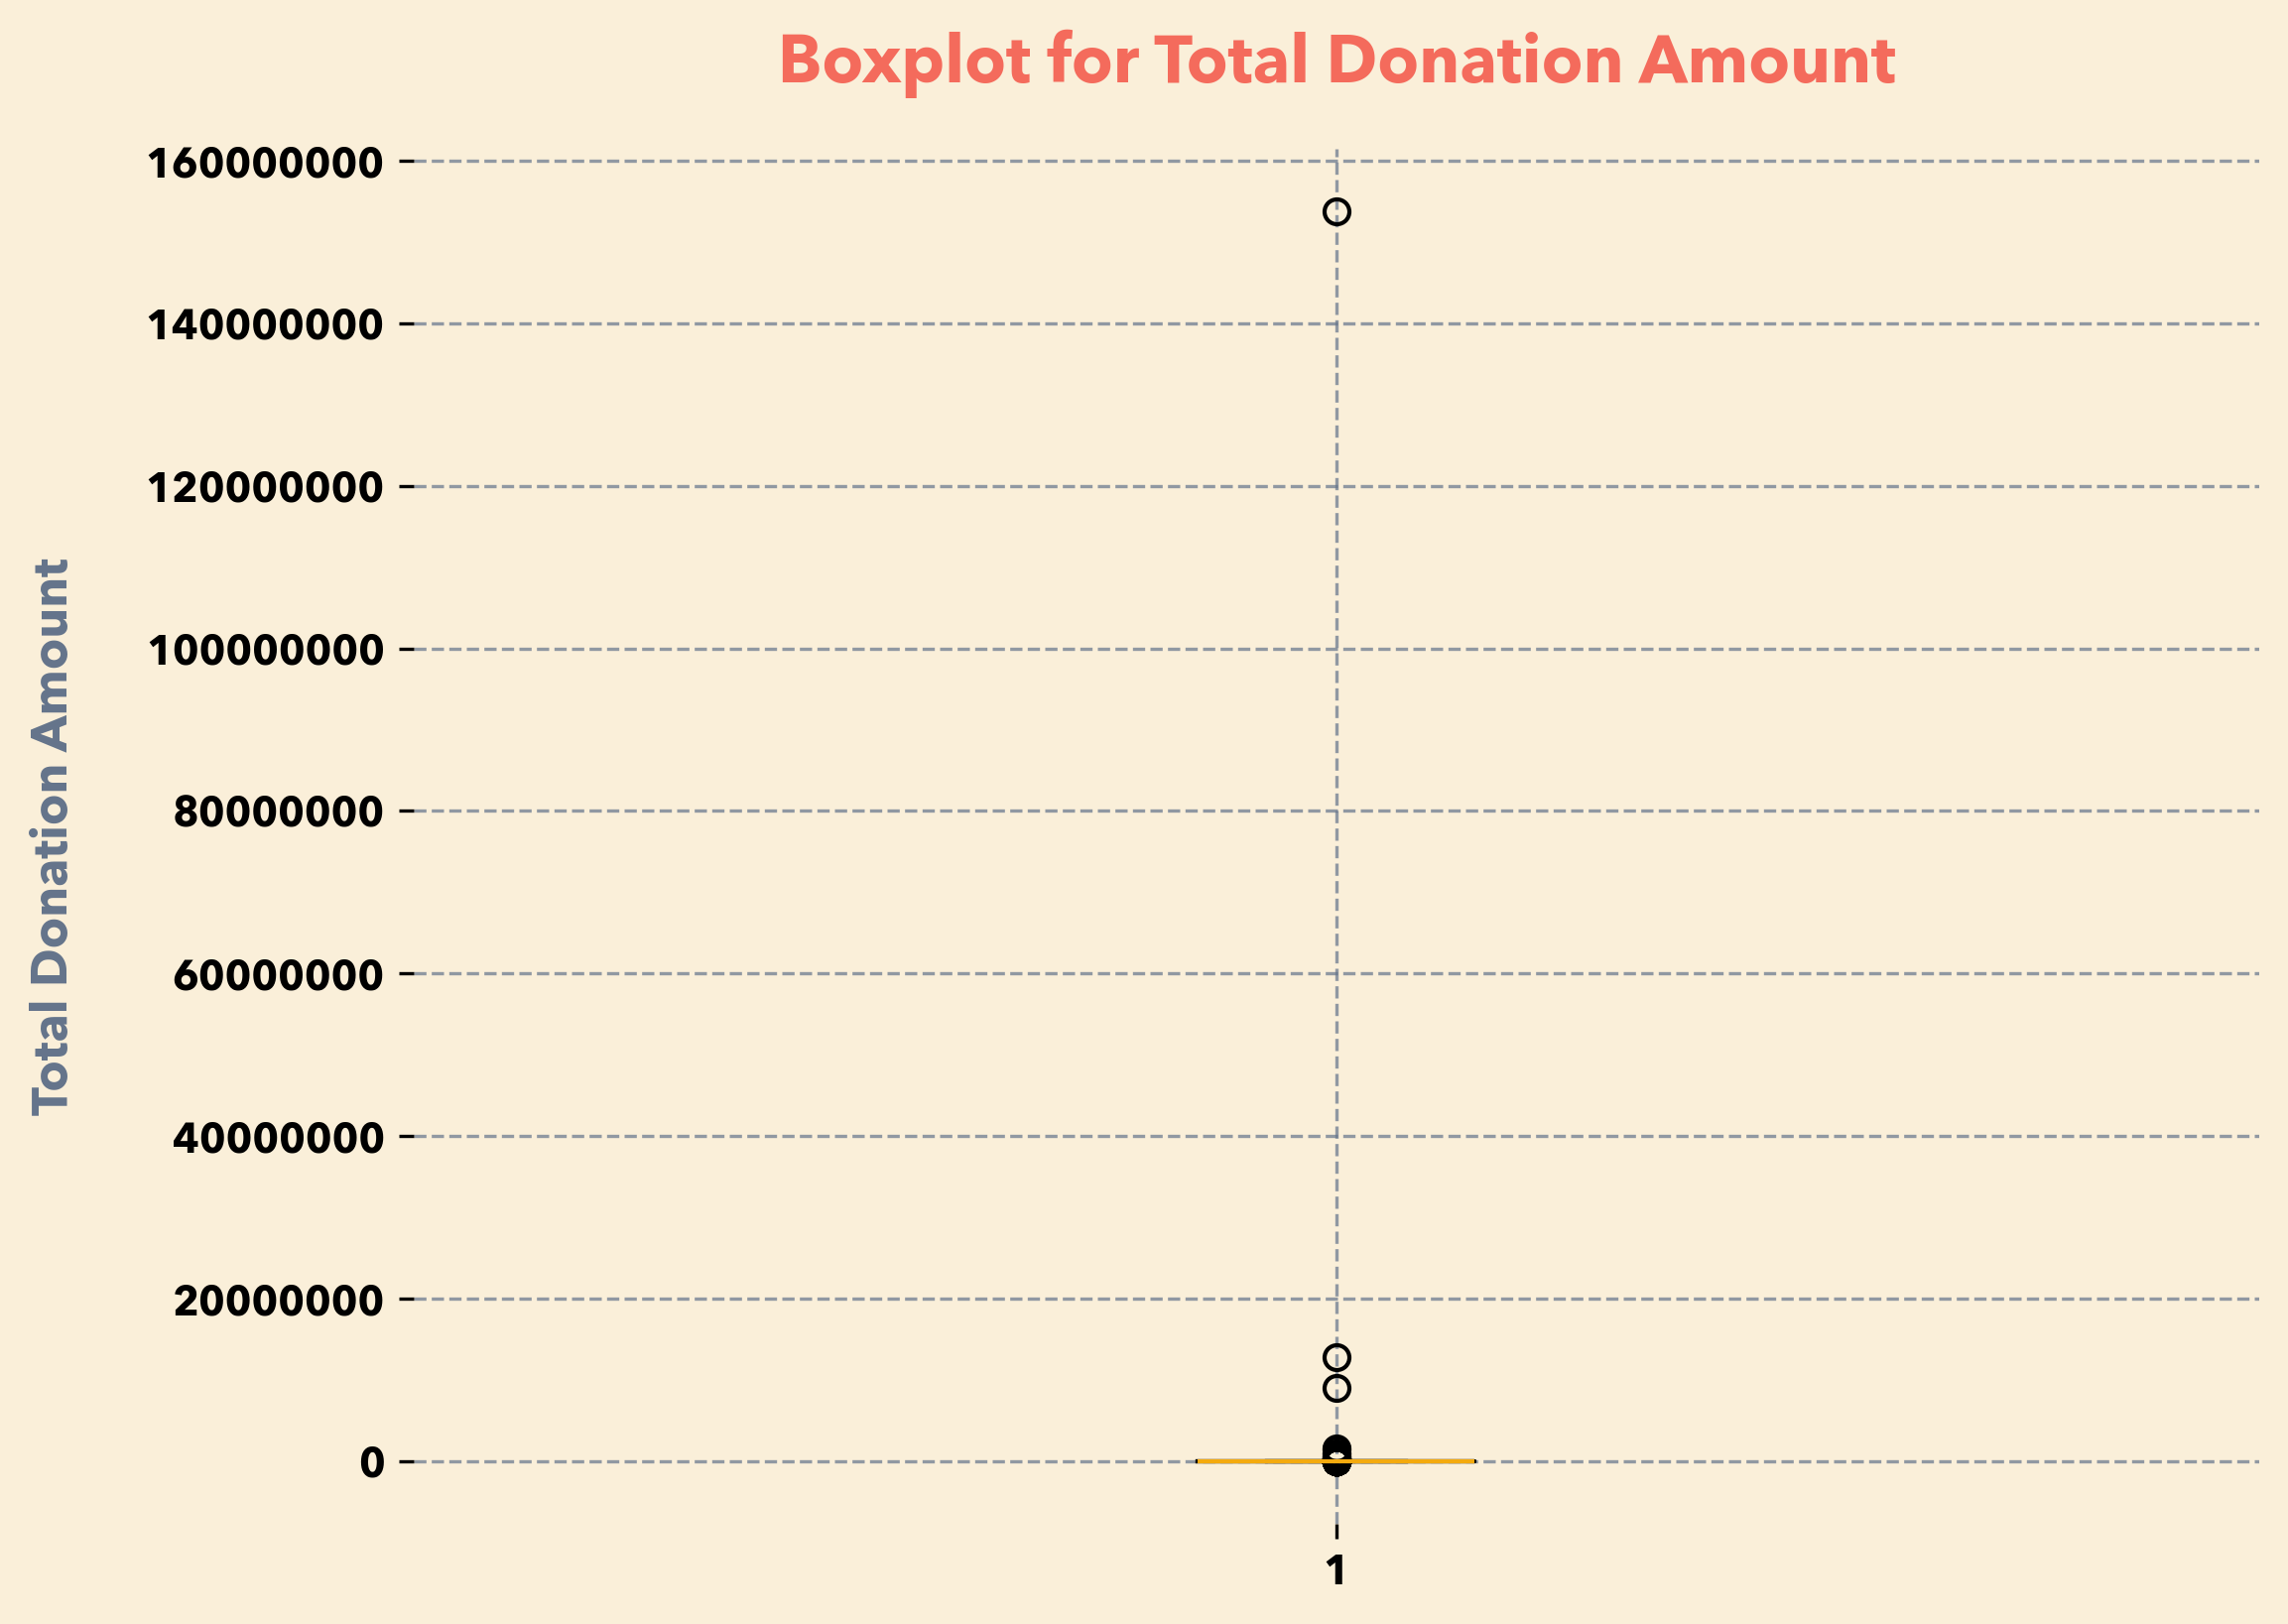

In [17]:
import matplotlib.pyplot as plt

plt.style.use('./slides.mplstyle')

# Assuming total_donation_amount is your Series or DataFrame column
# Create the box plot
plt.figure(figsize=(8, 6), dpi=300)
plt.boxplot(total_donation_amount)

# Set the y-axis tick label format to non-scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add title and labels
plt.title('Boxplot for Total Donation Amount')
plt.ylabel('Total Donation Amount')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [18]:
#Get all distinct category
# Step 1: Split values in the "Categories" column
categories_split = data_b['Categories'].str.split(',')
#print(categories_split)
# Step 2: Extract all unique categories
unique_categories = set(category for sublist in categories_split for category in sublist)
for category in unique_categories:
    print(category)

Fundraising

Medical
Families
Homeless
Hongbao for Hope
Frontliners
Mothers
Persons with disabilities
Food
Birthday Pledge
Lights for Hope
Transport
Test Email Tag
Family
Migrant Workers
An Evening in December
Living Expenses
Hawkers
GIC
Youths
Raya For Hope
Student
Charities
Children of drug offenders
Healthcare Workers
Private Campaign
Women
Stroke survivors
Year end pledge
Ray of Hope
New Start
Individual
Caregivers
Ray of Hope 10th Anniversary
Thematic Campaign
Children
Tchoukball Association
Registered society
Amputees
TMT
Education
Help Save Singaporeâ€™s Hardest Hit Families
Hope Beyond Borders
Single Parents
Zhiwen Birthday
Accident
Tuition Fees
Giving Week
Elderly
Persons with aphasia
COVID-19
ADHD
Special Needs
Mental Health
Giving Circle


In [19]:
#Assuming each donation is split equally across all category the donor stated
#Search for (Migrant Workers, Foreign Domestic Workers, Help Save Singaporeâ€™s Hardest Hit Families, Families, New Start)
#Show a visualisation about the average donations per donar across these categories

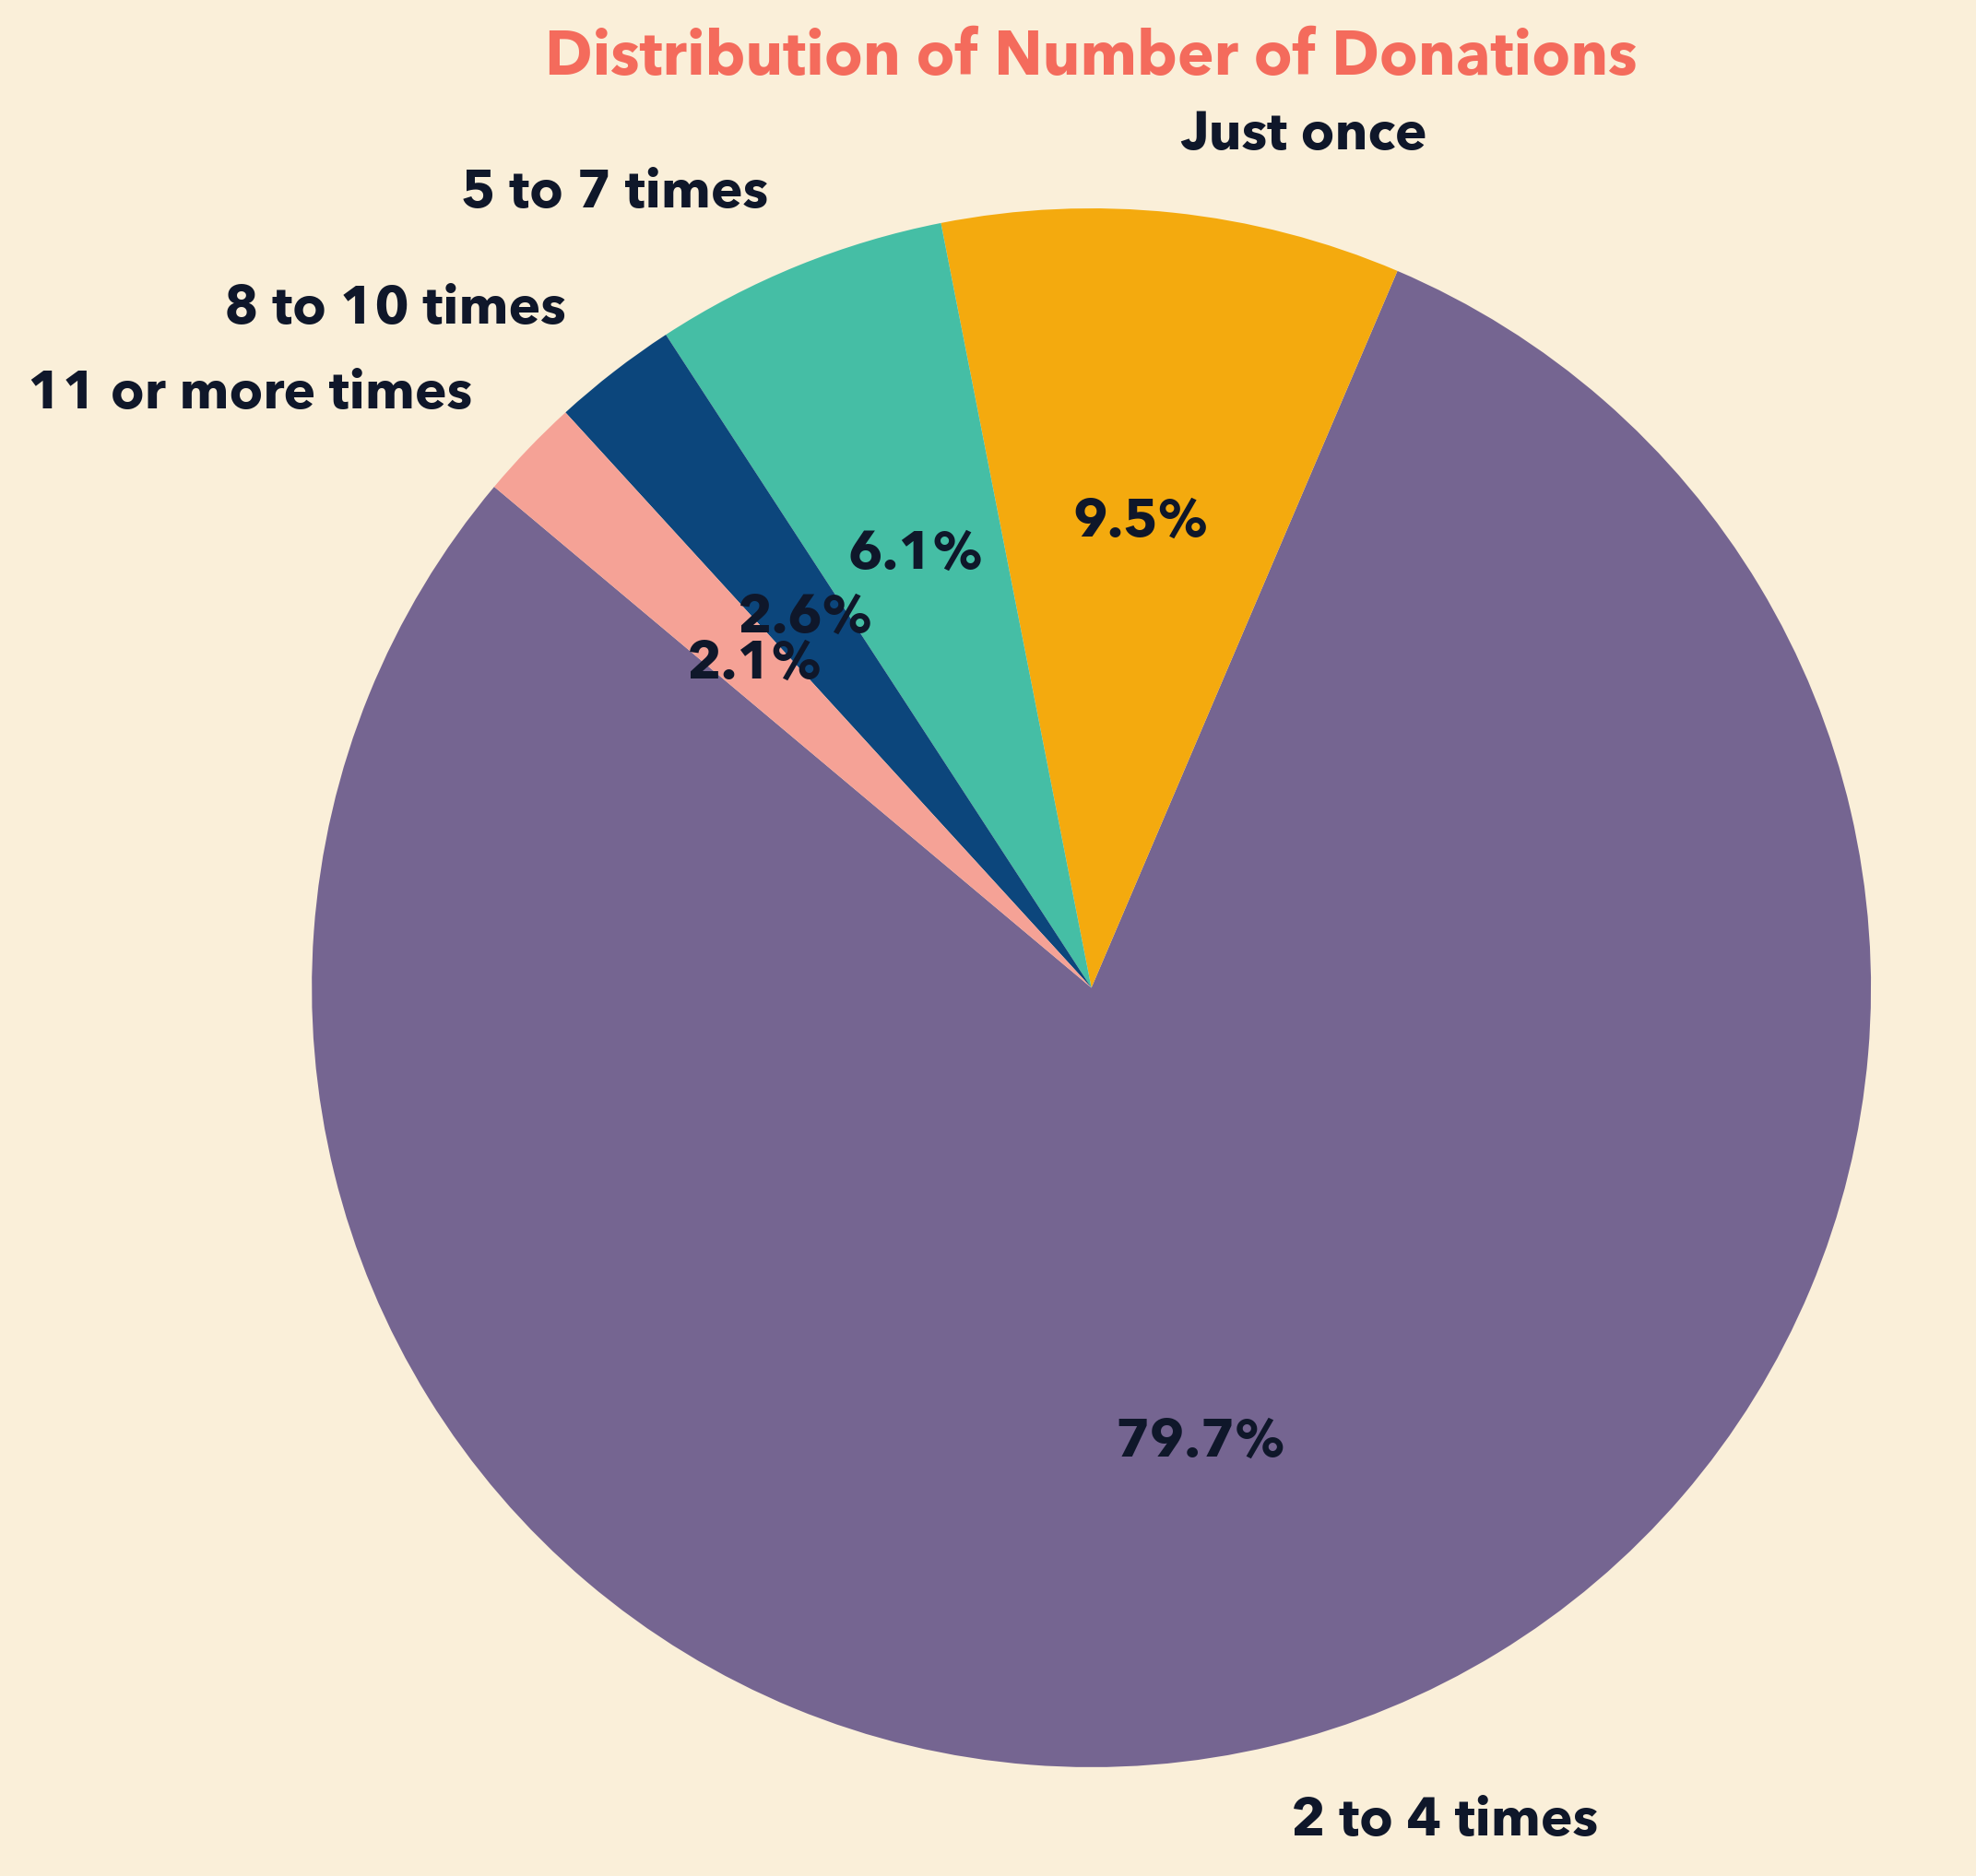

In [20]:
plt.style.use('./slides.mplstyle')

#check how many 1 , 2- 4, 5-7, 8-10, >10 repeated donar
# Step 1: Create bins
bins = [0, 1, 4, 7, 10, float('inf')]  # bins: 1, 2-4, 5-7, 8-10, >10
data_b['Donation Bins'] = pd.cut(data_b['Num Of Donations'], bins=bins, labels=['Just once', '2 to 4 times', '5 to 7 times', '8 to 10 times', '11 or more times'])

# Step 3: Count the number of values in each bin
donation_counts = data_b['Donation Bins'].value_counts()

# Step 4: Plot the distribution using a pie chart
plt.figure(figsize=(8, 8), dpi=300)
plt.pie(donation_counts, labels=donation_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of Number of Donations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

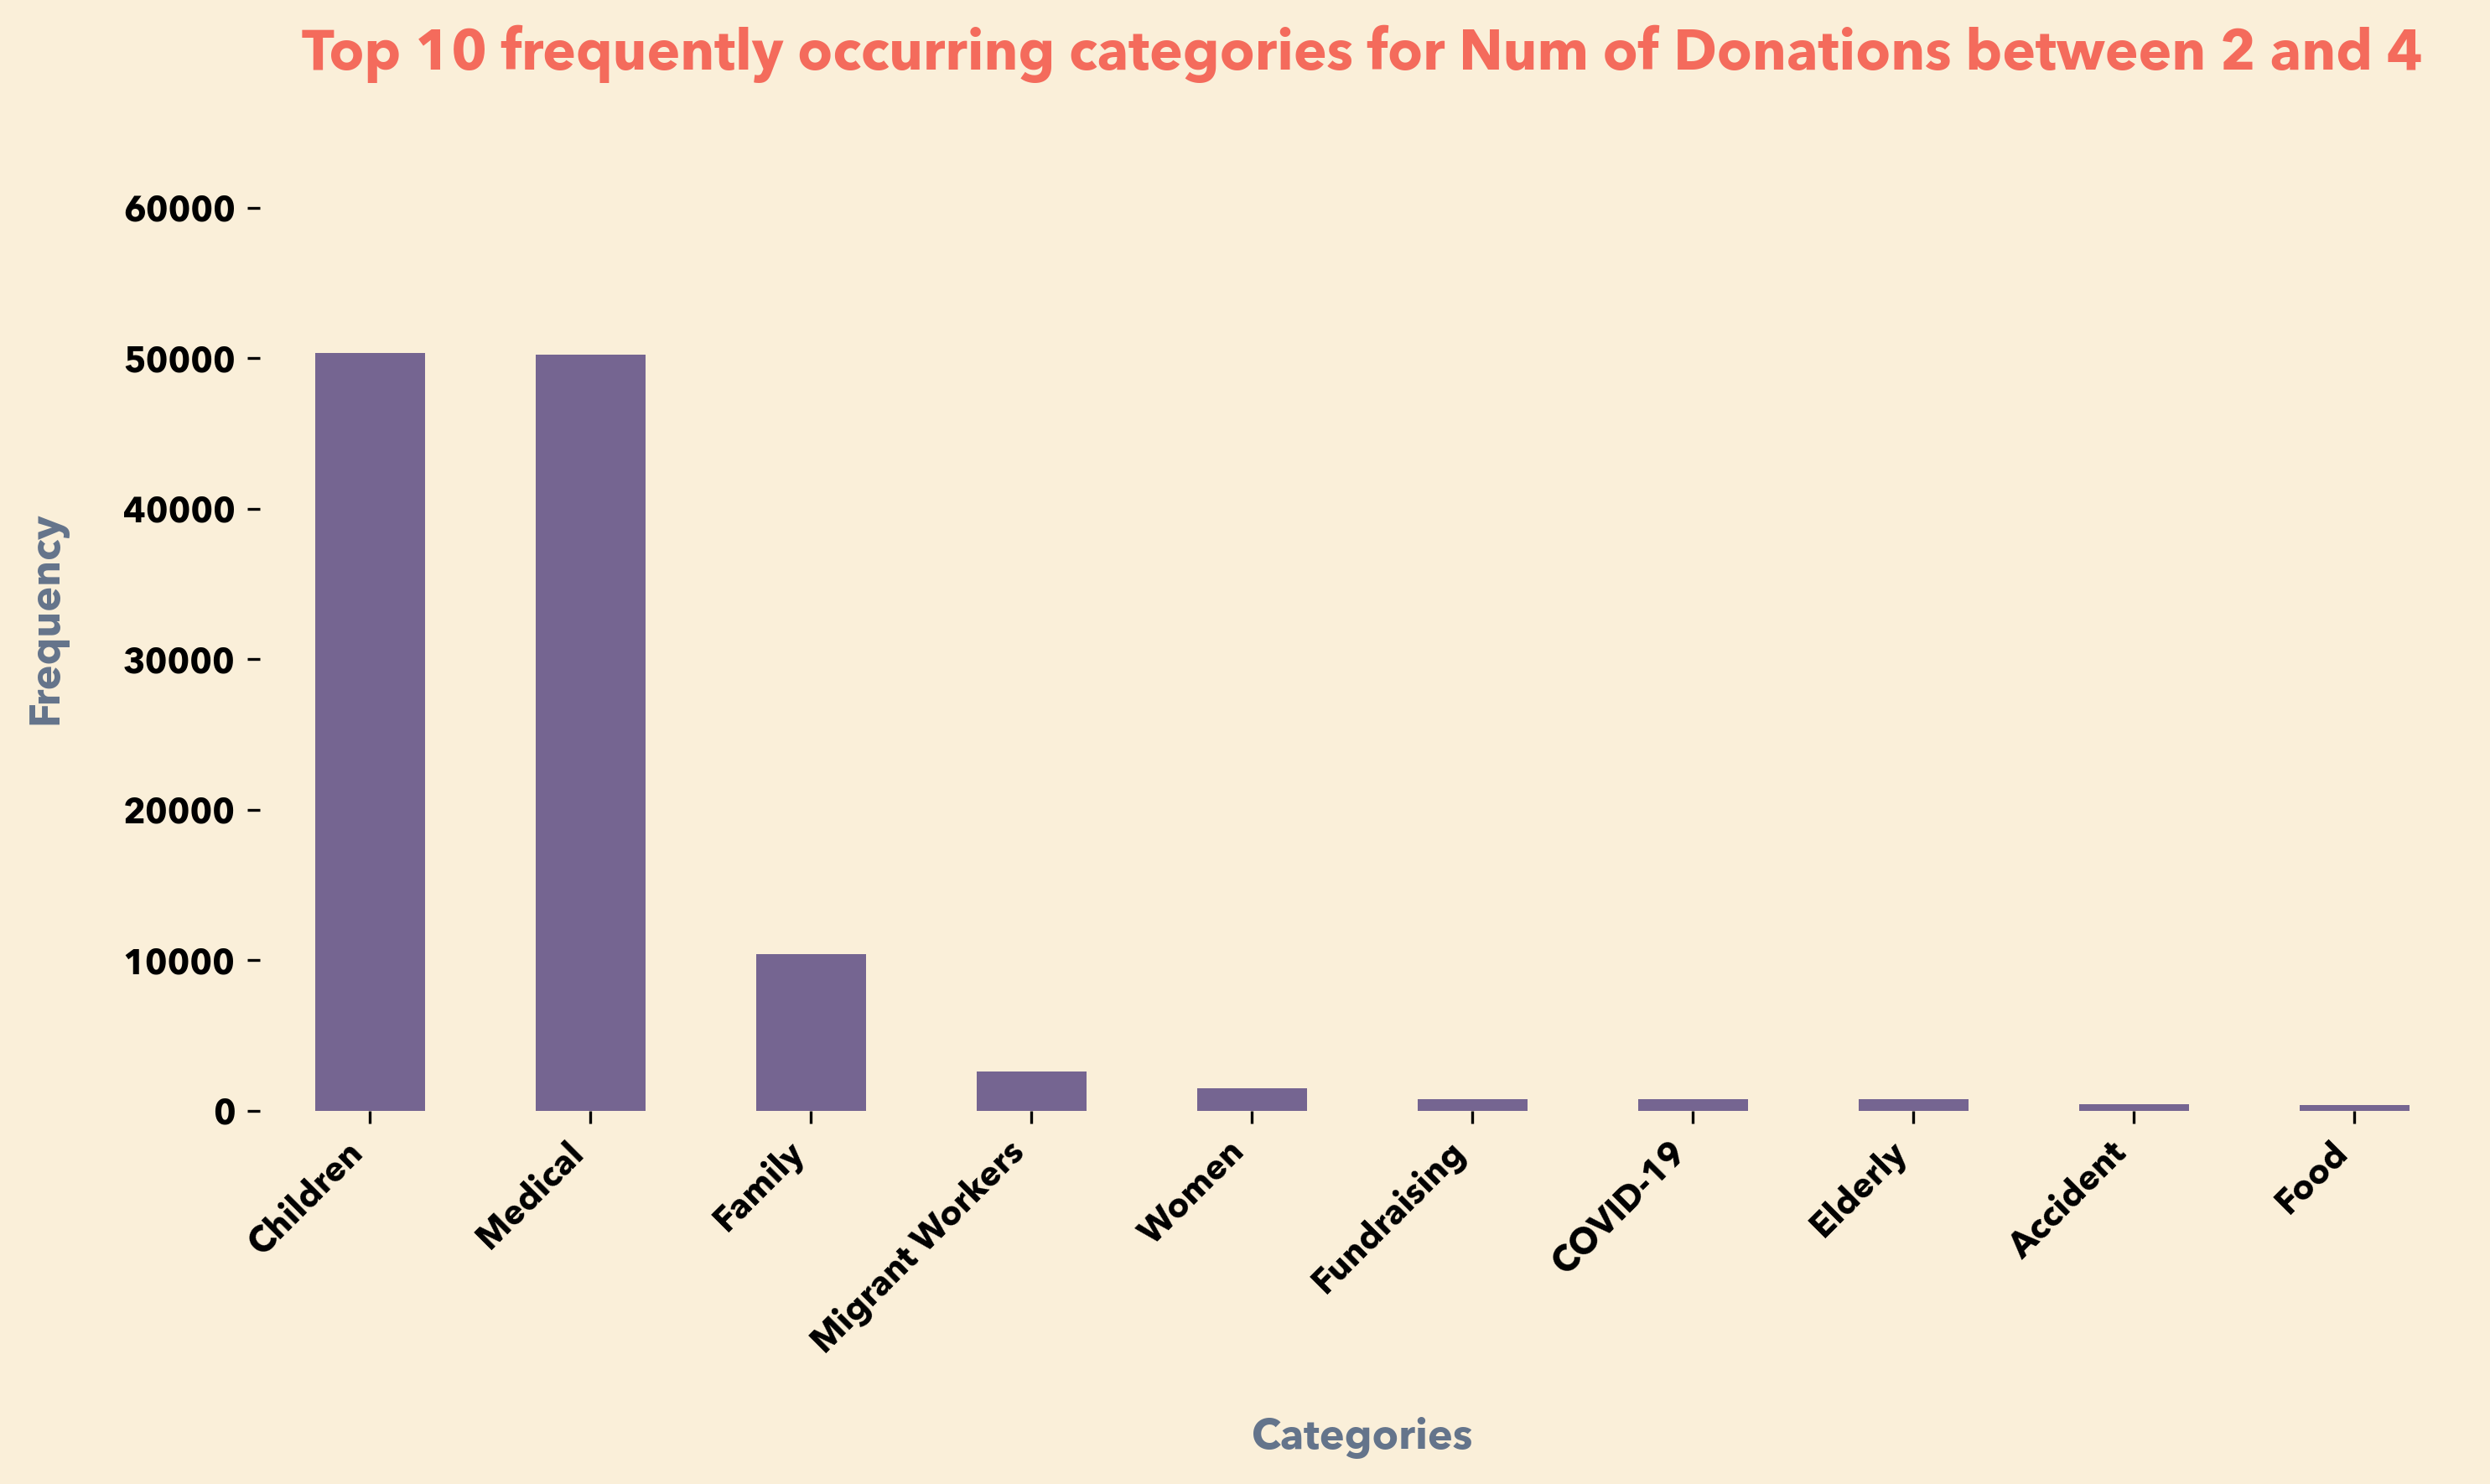

In [21]:
#Assuming each donation is split equally across all category the donor stated
#Search for (Migrant Workers, Foreign Domestic Workers, Help Save Singaporeâ€™s Hardest Hit Families, Families, New Start)
#Show a visualisation about the average donations per donar across these categories

# Filter the DataFrame for Num of Donations between 2 and 4
twoTofour = data_b[(data_b['Num Of Donations'] >= 2) & (data_b['Num Of Donations'] <= 4)]

# Split the 'Categories' column into individual categories
categories = twoTofour['Categories'].str.split(',').explode()

# Count the occurrence of each category
category_counts = categories.value_counts()

# Select the top 10 most frequently occurring categories
top_10_categories = category_counts.head(10)

# Plot the top 10 categories against their frequencies
plt.figure(figsize=(10, 6), dpi=300)
top_10_categories.plot(kind='bar')
plt.title('Top 10 frequently occurring categories for Num of Donations between 2 and 4')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Increase the range of y-axis
plt.ylim(0, top_10_categories.max() * 1.3)  # Adjust the multiplier as needed for desired range

plt.tight_layout()
plt.show()

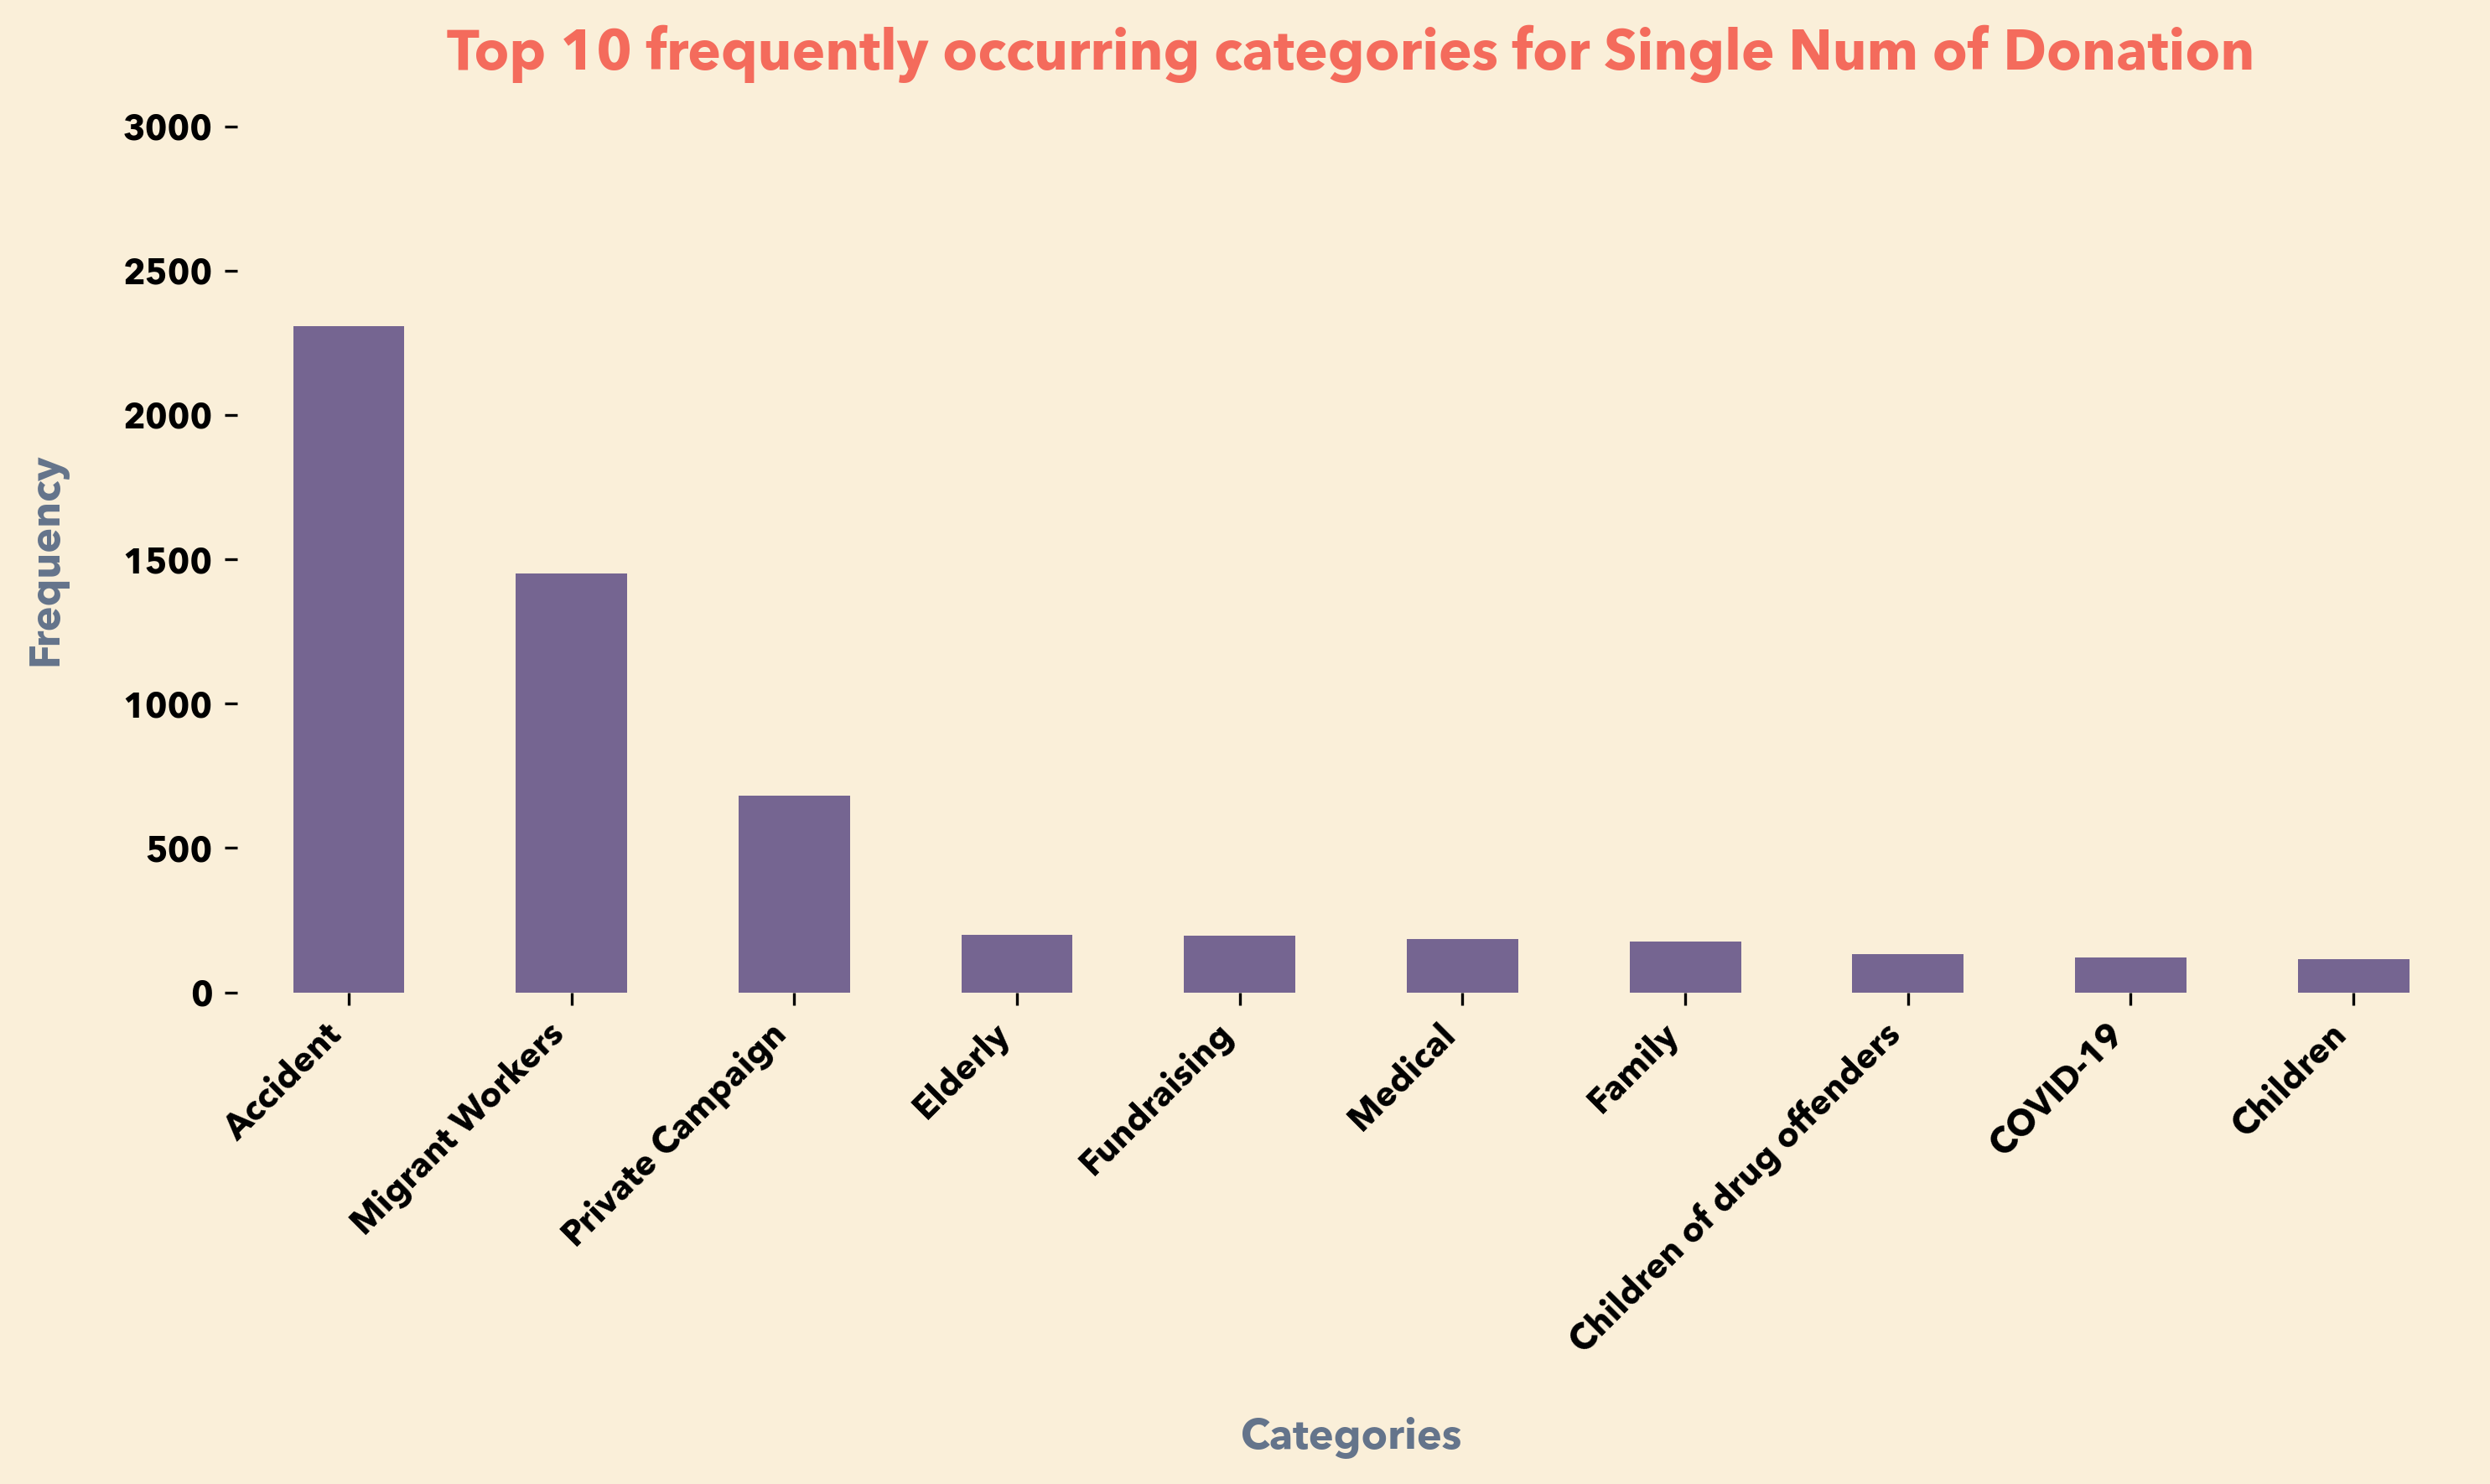

In [22]:
#what are the reason for single time donars - check the popular category in single time donar.

# Filter the DataFrame for single Num of Donation
twoTofour = data_b[(data_b['Num Of Donations'] == 1)]

# Split the 'Categories' column into individual categories
categories = twoTofour['Categories'].str.split(',').explode()

# Count the occurrence of each category
category_counts = categories.value_counts()

# Select the top 10 most frequently occurring categories
top_10_categories = category_counts.head(10)

# Plot the top 10 categories against their frequencies
plt.figure(figsize=(10, 6), dpi=300)
top_10_categories.plot(kind='bar')
plt.title('Top 10 frequently occurring categories for Single Num of Donation')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Increase the range of y-axis
plt.ylim(0, top_10_categories.max() * 1.3)  # Adjust the multiplier as needed for desired range

plt.tight_layout()
plt.show()

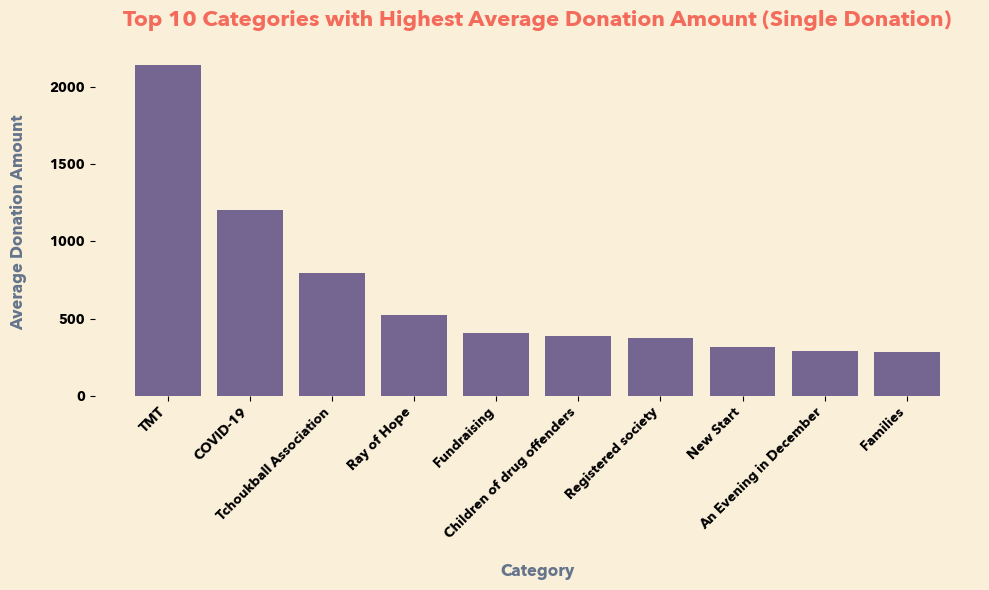

In [23]:
# Filter the DataFrame for rows with Num of Donations equal to 1
single_donation_df = data_b[data_b['Num Of Donations'] == 1]

# Split the 'Categories' column into individual categories
categories_split = single_donation_df['Categories'].str.split(',')

# Create a mapping of categories to donation amounts
category_to_donation_amounts = {}
for index, row in single_donation_df.iterrows():
    for category in categories_split[index]:
        category = category.strip()
        if category not in category_to_donation_amounts:
            category_to_donation_amounts[category] = []
        category_to_donation_amounts[category].append(row['Total Donation Amount'])

# Calculate the average donation amount for each category
average_donation_amounts = {category: sum(amounts) / len(amounts) for category, amounts in category_to_donation_amounts.items()}

# Sort the categories based on the average donation amount and select the top 10
top_10_categories = dict(sorted(average_donation_amounts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot the top 10 categories with the highest average donation amount
plt.figure(figsize=(10, 6))
plt.bar(top_10_categories.keys(), top_10_categories.values())
plt.title('Top 10 Categories with Highest Average Donation Amount (Single Donation)')
plt.xlabel('Category')
plt.ylabel('Average Donation Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Children: 57323 donors
Family: 14648 donors
Fundraising: 1671 donors
Medical: 57146 donors
Migrant Workers: 5762 donors
Elderly: 2068 donors
Food: 987 donors
Living Expenses: 99 donors
Accident: 3638 donors
Private Campaign: 1361 donors
Caregivers: 56 donors
Families: 195 donors
Giving Circle: 300 donors
Individual: 376 donors
New Start: 297 donors
Ray of Hope 10th Anniversary: 223 donors
Single Parents: 1102 donors
Special Needs: 711 donors
Student: 193 donors
Women: 2045 donors
COVID-19: 1568 donors
TMT: 38 donors
Hope Beyond Borders: 124 donors
Thematic Campaign: 655 donors
Persons with aphasia: 55 donors
Raya For Hope: 151 donors
Test Email Tag: 3 donors
Tuition Fees: 120 donors
Hongbao for Hope: 249 donors
Transport: 14 donors
An Evening in December: 14 donors
Birthday Pledge: 40 donors
Charities: 455 donors
Homeless: 91 donors
: 7 donors
Children of drug offenders: 202 donors
Education: 87 donors
Registered society: 129 donors
Lights for Hope: 138 donors
Help Save Singaporeâ€™s H

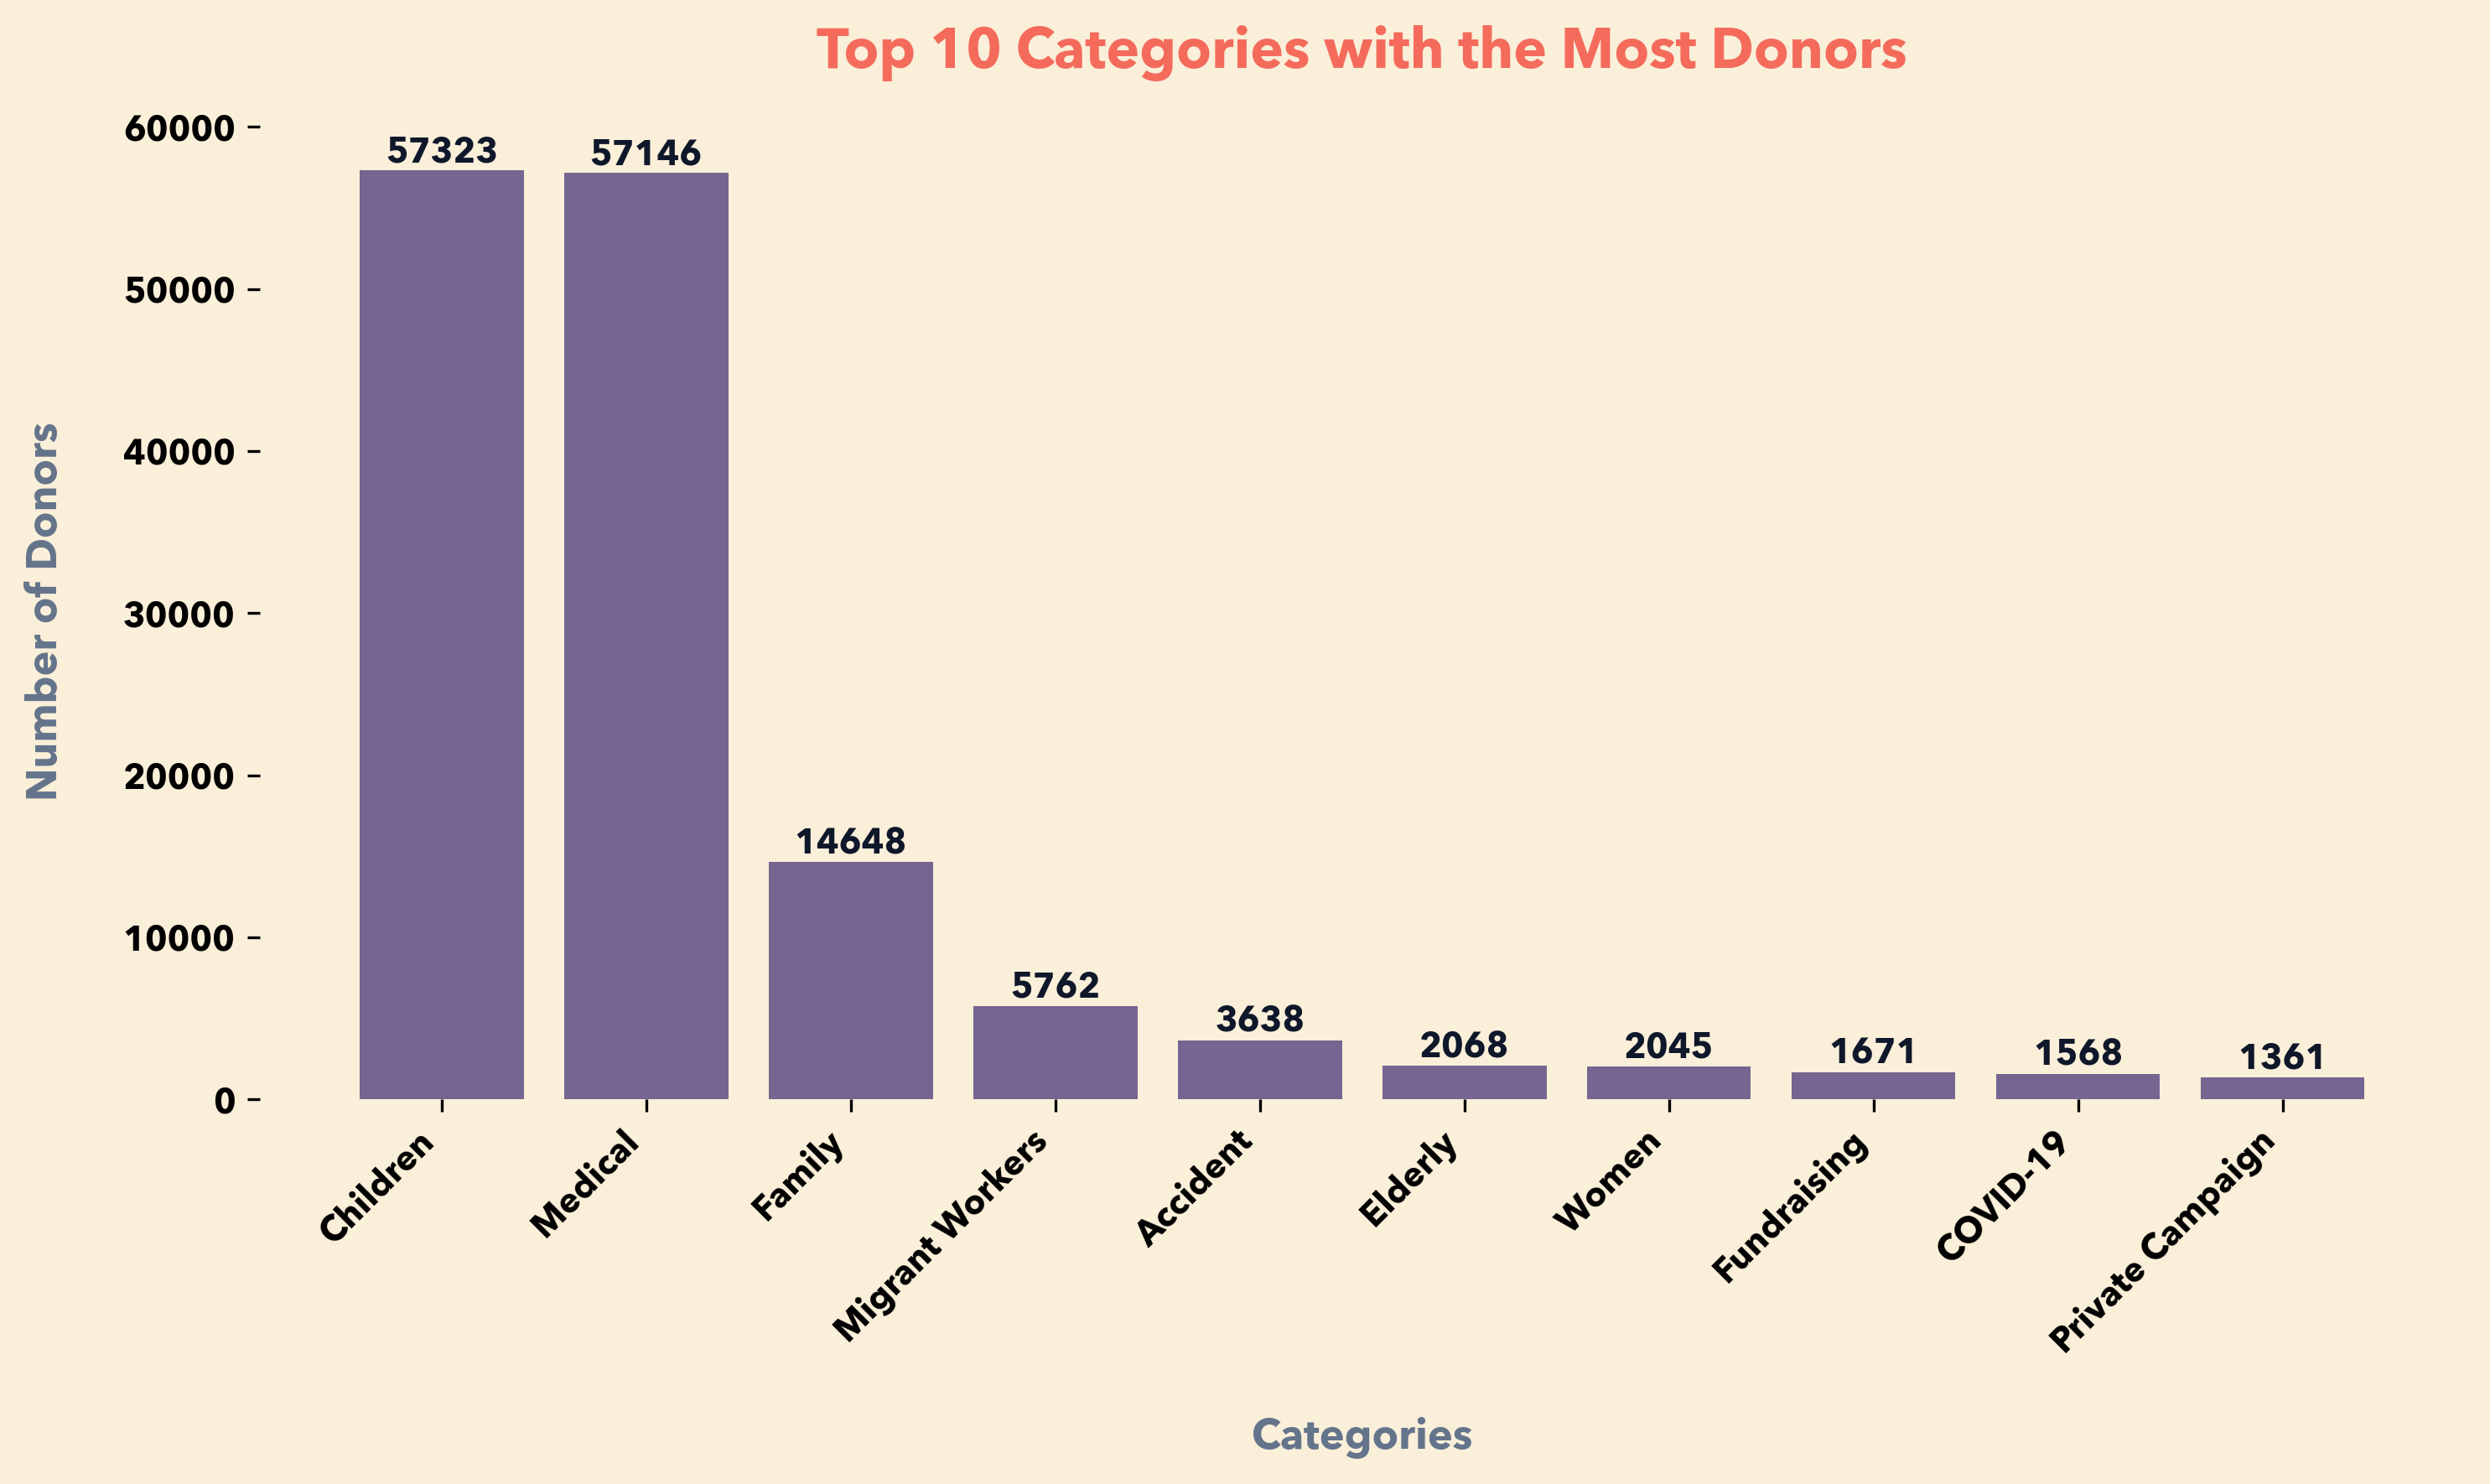

In [24]:
#Find how many donars for each category

# Split the 'Categories' column into individual categories
categories_split = data_b['Categories'].str.split(',')

# Create a mapping of categories to donors
category_to_donors = {}
for index, row in data_b.iterrows():
    for category in categories_split[index]:
        if category.strip() not in category_to_donors:
            category_to_donors[category.strip()] = set()
        category_to_donors[category.strip()].add(row['Donor ID'])

# Count the number of unique donors for each category
category_donors_count = {category: len(donors) for category, donors in category_to_donors.items()}

# Print the result
for category, count in category_donors_count.items():
    print(f"{category}: {count} donors")

# Sort the categories based on the number of donors and select the top 10
top_10_categories = sorted(category_donors_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract category names and their corresponding donor counts
categories = [category[0] for category in top_10_categories]
donor_counts = [category[1] for category in top_10_categories]

# Plot the top 10 categories with the most donors
plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(categories, donor_counts)
plt.title('Top 10 Categories with the Most Donors')
plt.xlabel('Categories')
plt.ylabel('Number of Donors')
plt.xticks(rotation=45, ha='right')

# Add quantitative label on each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()